In [1]:
from random import random, seed, randrange
from math import floor, pi
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
import pandas as pd
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
from time import time
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]

In [2]:
%run -i "..\carbon_walls\gcmc.py"

In [3]:
total_data = pd.DataFrame()
for file in os.listdir('data'):
    df = pd.read_csv( "data/" + file)
    total_data = total_data.append( df )
total_data['T_res'] = total_data.T_res.astype("int").astype("str")
total_data.head()

OSError: Initializing from file failed

In [4]:
colors = {"30":"blue", "45":"purple", "60":"red"}
plt.scatter(
    x = total_data.P_res,
    y = total_data.P_sim,
    c = total_data.T_res.map(colors),
    alpha = 0.4
)
plt.plot(
    np.linspace(0,220,100),
    np.linspace(0,220,100)
)

AttributeError: 'DataFrame' object has no attribute 'P_res'

In [5]:
plt.scatter(
    x = total_data.yco_res,
    y = total_data.yco_sim,
    c = total_data.T_res.map(colors),
    alpha = 0.2
)

AttributeError: 'DataFrame' object has no attribute 'yco_res'

In [6]:
plt.scatter(
    x = total_data.P_res,
    y = total_data.yco_sim,
    c = total_data.T_res.map(colors),
    alpha = 0.3
)

AttributeError: 'DataFrame' object has no attribute 'P_res'

In [ ]:
subset = total_data[total_data.T_res == "45" ].copy()
subset['yco_res'] = subset.yco_res.astype("str")
colors = {"1.0":"#7b3294", "0.75":"#a285af", "0.5":"#a7a7a7", "0.25":"#86bb80", "0.0":"#008837"}

x = np.linspace(10,200,20)
T = 45 + 273.15 #K
kb = 1.3806*10**(7) #[Pa*A^3/K]
Y = [0.0, 0.25, 0.5, 0.75, 1.0]
rhos = np.zeros( 20 )

for y in Y:
    i = 0
    for p in x:
        Z = PR_Zmix( p, T, y)
        if (Z > 0):
            rhos[i] = y*p*10**5/kb/T/Z
        i = i+1
    
    subsubset = subset[subset.yco_res == str(y)]
    plt.scatter(
        x = subsubset.P_res,
        y = subsubset.rhoco,
        c = subsubset.yco_res.map(colors),
        alpha = 0.3
    )
    plt.plot(x,rhos, label = y, c = colors[str(y)])

plt.legend()

In [ ]:
subset = total_data[total_data.T_res == "45" ].copy()
subset['yco_res'] = subset.yco_res.astype("str")
colors = {"0.0":"#7b3294", "0.25":"#a285af", "0.5":"#a7a7a7", "0.75":"#86bb80", "1.0":"#008837"}

x = np.linspace(10,200,20)
T = 45 + 273.15 #K
kb = 1.3806*10**(7) #[Pa*A^3/K]
Y = [0.0, 0.25, 0.5, 0.75, 1.0]
rhos = np.zeros( 20 )

for y in Y:
    i = 0
    for p in x:
        Z = PR_Zmix( p, T, y)
        if (Z > 0):
            rhos[i] = (1-y)*p*10**5/kb/T/Z
        i = i+1
    
    subsubset = subset[subset.yco_res == str(y)]
    plt.scatter(
        x = subsubset.P_res,
        y = subsubset.rhome,
        c = subsubset.yco_res.map(colors),
        alpha = 0.3
    )
    plt.plot(x,rhos, label = y, c = colors[str(y)])

plt.legend()

In [ ]:
subset = total_data[total_data.T_res == "45" ].copy()
subset['yco_res'] = subset.yco_res.astype("str")
colors = {"0.0":"#7b3294", "0.25":"#a285af", "0.5":"#a7a7a7", "0.75":"#86bb80", "1.0":"#008837"}

x = np.linspace(10,200,20)
T = 45 + 273.15 #K
kb = 1.3806*10**(7) #[Pa*A^3/K]
Y = [0.0, 0.25, 0.5, 0.75, 1.0]
rhos = np.zeros( 20 )

for y in Y:
    i = 0
    for p in x:
        Z = PR_Zmix( p, T, y)
        if (Z > 0):
            rhos[i] = p*10**5/kb/T/Z
        i = i+1
    
    subsubset = subset[subset.yco_res == str(y)]
    plt.scatter(
        x = subsubset.P_res,
        y = subsubset.rhome + subsubset.rhoco,
        c = subsubset.yco_res.map(colors),
        alpha = 0.3,
        label = y
    )
    plt.plot(x,rhos, label = y, c = colors[str(y)])

plt.legend()

In [45]:
PR_Zmix(10, T, 0.5)

2.3431233464597335e-09

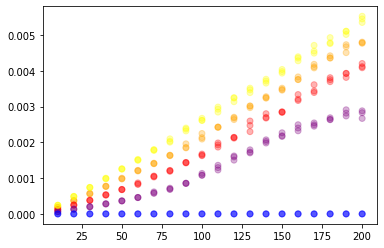

In [60]:
subset = total_data[total_data.T_res == "30.0" ].copy()
subset['yco_res'] = subset.yco_res.astype("string")
colors = {"1.0":"blue", "0.75":"purple", "0.5":"red", "0.25":"orange", "0.0":"yellow"}
plt.scatter(
    x = subset.P_res,
    y = subset.rhome,
    c = subset.yco_res.map(colors),
    alpha = 0.3
)